In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [2]:
df = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 425s 2us/step


In [3]:
(x_train, y_train),(x_test,y_test)=df

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

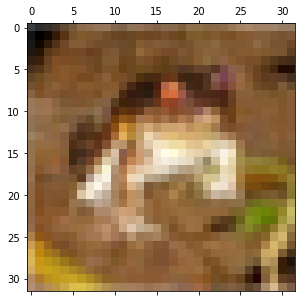

In [7]:
plt.matshow(x_train[0])

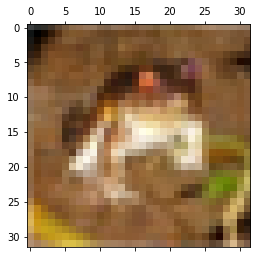

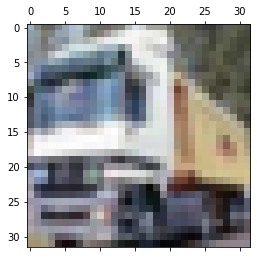

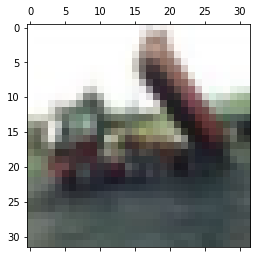

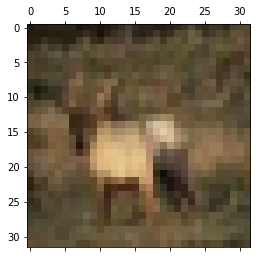

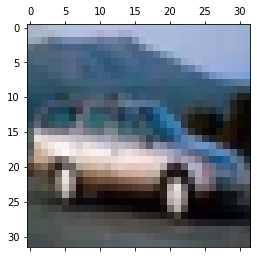

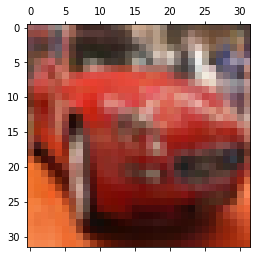

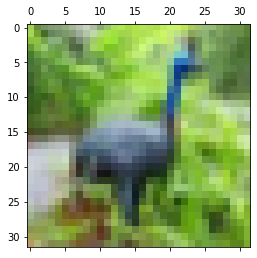

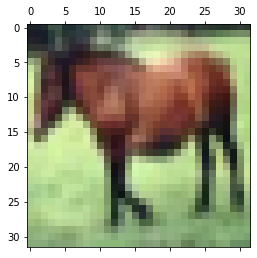

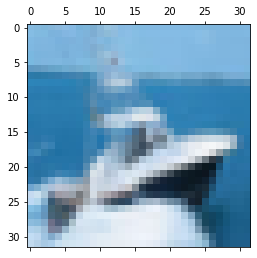

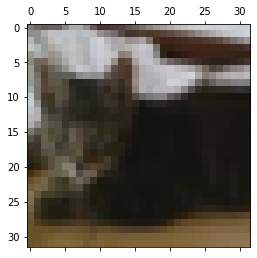

In [8]:
for i in range(10):
  plt.matshow(x_train[i])

In [9]:
x_train = x_train.astype('float32')         
x_test = x_test.astype('float32')
x_train /= 255.0              
x_test /= 255.0

In [10]:
model = tf.keras.models.Sequential() 
# USING MULTIPLE LAYERS TO MAKE THE MODEL ACCURATE
model.add(tf.keras.layers.InputLayer(input_shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))) 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 


In [12]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 10)                81930     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(x_train, y_train, batch_size=32, epochs=20) 

Epoch 1/20
1563/1563 [==============================] - 95s 45ms/step - loss: 1.4643 - accuracy: 0.4843
Epoch 2/20
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1820 - accuracy: 0.5911
Epoch 3/20
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0704 - accuracy: 0.6314
Epoch 4/20
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9988 - accuracy: 0.6570
Epoch 5/20
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9538 - accuracy: 0.6718
Epoch 6/20
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9105 - accuracy: 0.6863
Epoch 7/20
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8804 - accuracy: 0.6956
Epoch 8/20
1563/1563 [==============================] - 54s 35ms/step - loss: 0.8540 - accuracy: 0.7024
Epoch 9/20
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8270 - accuracy: 0.7142
Epoch 10/20
1563/1563 [==============================] - 56s 36m

In [14]:
pred = model.predict(x_test)
pred

313/313 [==============================] - 11s 15ms/step


array([[1.6712883e-04, 9.2033520e-07, 6.4819172e-04, ..., 1.3614379e-04,
        6.2584803e-03, 2.2413247e-04],
       [3.6157727e-02, 2.7827418e-01, 4.2695056e-08, ..., 9.4805985e-10,
        6.7695671e-01, 8.6112302e-03],
       [4.7363648e-01, 1.4328358e-01, 1.1515263e-02, ..., 1.1245481e-02,
        2.6766077e-01, 8.8189386e-02],
       ...,
       [1.9966374e-06, 1.3977693e-07, 4.6735559e-02, ..., 3.7476674e-02,
        1.3337265e-05, 4.5183631e-05],
       [8.2187754e-01, 1.6165781e-01, 2.4476243e-04, ..., 1.6297938e-05,
        5.4095831e-04, 7.8390597e-04],
       [1.3119994e-06, 6.0211755e-06, 1.1015886e-04, ..., 8.8568932e-01,
        1.3977074e-06, 3.4486915e-05]], dtype=float32)

In [15]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 13s 17ms/step - loss: 1.1882 - accuracy: 0.6276


[1.1882492303848267, 0.6276000142097473]